In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
train.columns = train.columns.str.lower()

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          714 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  cabin        204 non-null    object 
 11  embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train['age'].value_counts(dropna=False)

NaN      177
24.00     30
22.00     27
18.00     26
28.00     25
        ... 
36.50      1
55.50      1
66.00      1
23.50      1
0.42       1
Name: age, Length: 89, dtype: int64

In [7]:
train['age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [8]:
import matplotlib as plt
%matplotlib inline

In [9]:
train['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

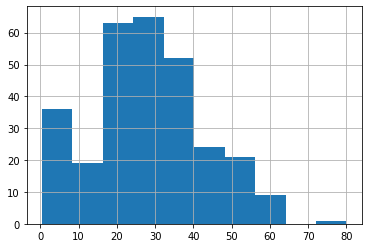

In [10]:
mask_survived = train['survived'] == 1 
mask_not_survived = train['survived'] == 0 

train[mask_survived]['age'].hist()

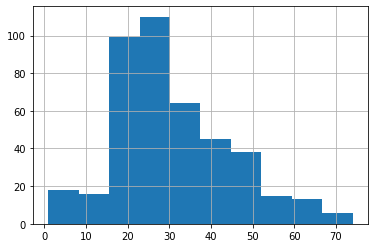

In [11]:
train[mask_not_survived]['age'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000172249C0108>,
      dtype=object)

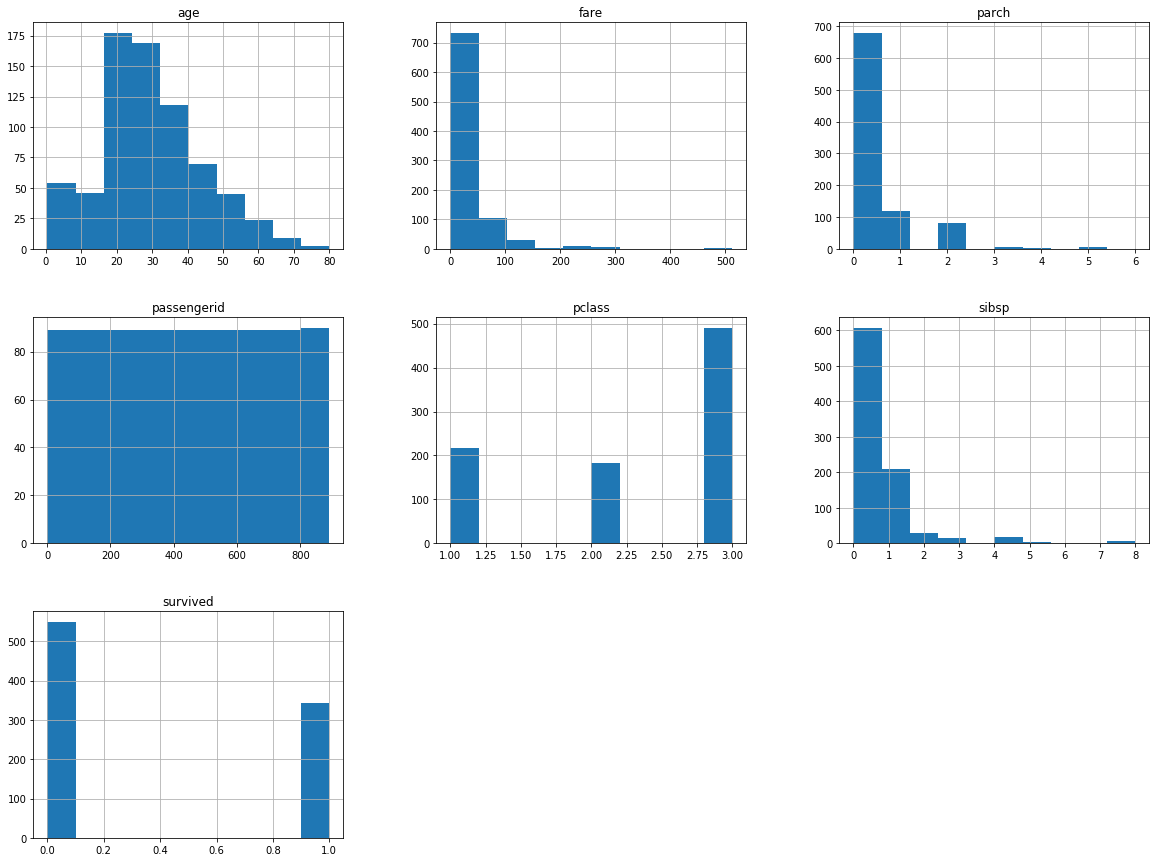

In [12]:
train.hist(bins=10, figsize=(20,15))

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          714 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  cabin        204 non-null    object 
 11  embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [25]:
#Split the data set into categorical and numerical features for a better handling.

num_features = train.describe().columns.tolist() # describe only brings numerical values. 
cat_features = [col for col in train.columns.tolist() if col not in num_features] # Rest of the columns
 
train.describe()

,passengerid,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [26]:
cat_features

['name', 'sex', 'ticket', 'cabin', 'embarked']

In [27]:
num_features

['passengerid', 'survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']

In [16]:
matrix_correlation = train.corr()
matrix_correlation['age']

passengerid    0.036847
survived      -0.077221
pclass        -0.369226
age            1.000000
sibsp         -0.308247
parch         -0.189119
fare           0.096067
Name: age, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017223E5DE48>,
      dtype=object)

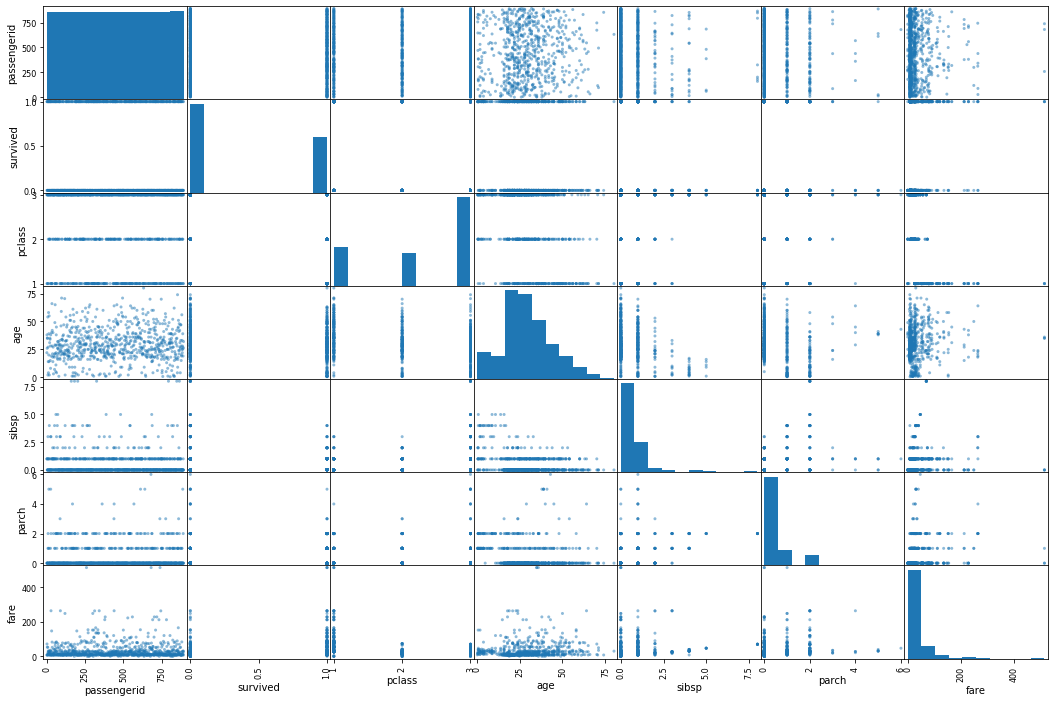

In [28]:
from pandas.plotting import scatter_matrix

scatter_matrix(train[num_features],figsize=(18,12))

##### Null treatment criteria

We'll use the follow criteria to fill the null values in the dataset:
* Due to the low amount of data (891 datapoints), try to don't drop any row
* For the numerical data, we'll use the median value
* To the categorical data, we'll use the moda

age_mean = train['age'].mean()
train['age'] = train['age'].fillna(age_mean)
age_mean_after = train['age'].mean()

age_mean_after

In [61]:
cols = ['passengerid', 'pclass', 'age', 'sibsp', 'parch', 'fare']
X_train = train[cols] # .drop('survived', axis = 1) #train[train.columns.remove('survived')] Este no funciono
y_train = train['survived'].copy()

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

deaths_predictions = lin_reg.predict(X_train)
lin_mse = mean_squared_error(y_train, deaths_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.44440050995060965

Cross Validation:

In [63]:
from sklearn.model_selection import cross_val_score

lin_reg_scores = cross_val_score(lin_reg, X_train, y_train, cv=10)
lin_reg_scores.mean()


0.11802841034827401

##### First prediction

After first prediction, almoust without any value treatment, we reach a 0.44 for rmse and a 0.12 mean for the cv scores. With this terribles values, lets try a little harder with a improved pipeline:

##### Pipeline for numerical values

In [30]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

In [41]:
'''
What this class does? 

take a list of attributes names and return a sub-dataframe with those features. 
How this reacts when we call it from a pipe line:

* First call the fit function to set the status of our data. 
* Then applies the transfor function, where the behaivior that we are expecting  happens

'''
class DataFrameFeatureSelector(BaseEstimator, TransformerMixin):

    def __init__(self, attributes_names):
        self.atributes_names = attributes_names
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.atributes_names].values

In [53]:
class DataFrameFeatureSelector(BaseEstimator, TransformerMixin):
'''
What this class does? 

take a list of attributes names and return a sub-dataframe with those features. 
How this reacts when we call it from a pipe line:

* First call the fit function to set the status of our data. 
* Then applies the transfor function, where the behaivior that we are expecting happens

'''
    def __init__(self, attributes_names):
        self.atributes_names = attributes_names
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        rentun X[self.atributes_names].values

IndentationError: expected an indented block (<ipython-input-53-3d0ee1d2d995>, line 11)

## Pipeline

In [42]:
# List of transformations tuples with the format: (Name, function)
# Pipeline of data tranformation, no modeling yet
num_pipeline = Pipeline([
    ('feature_selection', DataFrameFeatureSelector(num_features)),             
    ('simple_imputer', SimpleImputer()), # strategy='mean' by default
    ('scaling_data', MinMaxScaler())
])


model = num_pipeline.fit_transform(train)

In [49]:
df = pd.DataFrame(model, columns=num_features)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001722C23C548>,
      dtype=object)

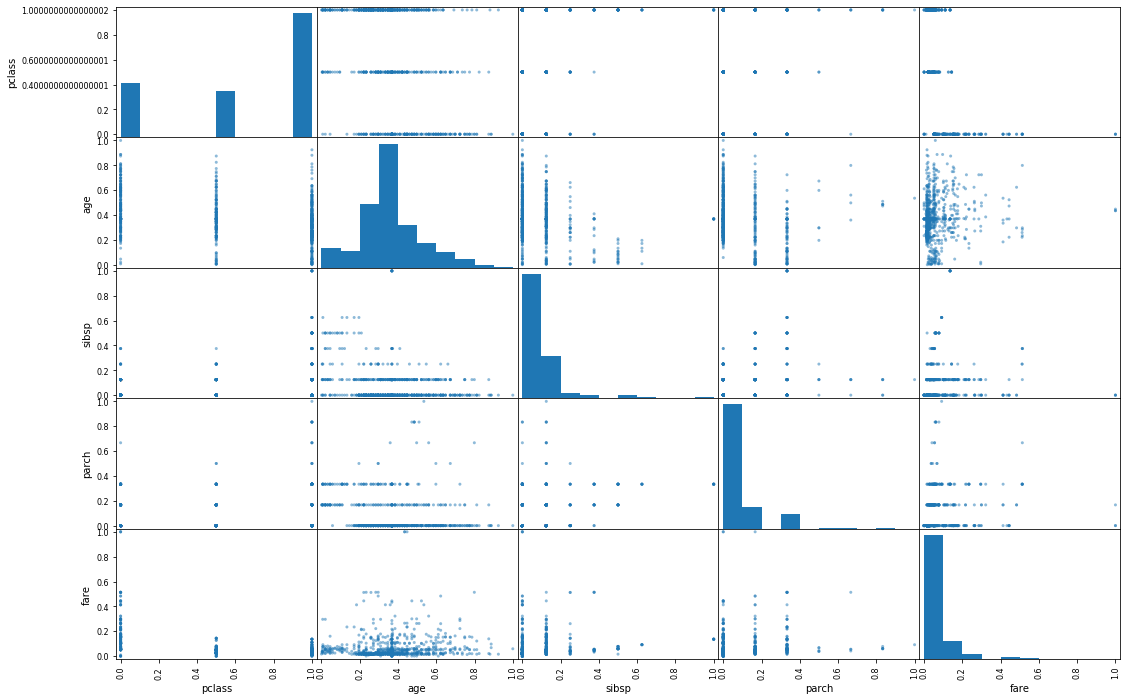

In [54]:
scatter_matrix(df[['pclass','age','sibsp','parch','fare']],figsize=(18,12))

In [52]:
test = pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [58]:
test.columns = test.columns.str.lower()

In [59]:
X_test = test[cols]
predictions_test = lin_reg.predict(X_test)
predictions_test

KeyError: "['survived'] not in index"